In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
df_accepted = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260701, 151)


- Dữ liệu khá là lớn bao gồm  2260701 dòng và 151 cột 

In [4]:
df_accepted.issue_d

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
2260699         NaN
2260700         NaN
Name: issue_d, Length: 2260701, dtype: object

In [5]:
df_accepted.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [6]:
df=df_accepted.copy()

In [7]:
df.loan_status

0           Fully Paid
1           Fully Paid
2           Fully Paid
3              Current
4           Fully Paid
              ...     
2260696        Current
2260697    Charged Off
2260698        Current
2260699            NaN
2260700            NaN
Name: loan_status, Length: 2260701, dtype: object

# xử lý data 

In [8]:
df.loan_status

0           Fully Paid
1           Fully Paid
2           Fully Paid
3              Current
4           Fully Paid
              ...     
2260696        Current
2260697    Charged Off
2260698        Current
2260699            NaN
2260700            NaN
Name: loan_status, Length: 2260701, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [10]:
df.duplicated().sum()

0

- dữ liệu không có giá trị nào trùng lặp

In [11]:
df.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260697,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2260698,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260699,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [12]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [13]:
df.isnull().sum().sort_values(ascending=False)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
                                               ...   
policy_code                                        33
revol_bal                                          33
fico_range_high                                    33
fico_range_low                                     33
id                                                  0
Length: 151, dtype: int64

In [14]:
cols_to_drop = df.isnull().sum().sort_values(ascending=False).head(50).index
df = df.drop(columns=cols_to_drop)
df.shape

(2260701, 101)

In [15]:
cols_to_drop = df.isnull().sum().sort_values(ascending=False).head(45).index
df = df.drop(columns=cols_to_drop)
df.shape

(2260701, 56)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 56 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   home_ownership              object 
 10  annual_inc                  float64
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  url                         object 
 16  purpose                     object 
 17  zip_code                    object 
 18  addr_state                  object 
 19  dti                  

In [17]:
nulls = df.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/df.shape[0]*100)
nulls_percentage.head(15)

last_pymnt_d                  0.108816
revol_util                    0.081170
dti                           0.077144
pub_rec_bankruptcies          0.061839
collections_12_mths_ex_med    0.007874
chargeoff_within_12_mths      0.007874
tax_liens                     0.006104
last_credit_pull_d            0.004645
inq_last_6mths                0.002787
delinq_2yrs                   0.002743
open_acc                      0.002743
pub_rec                       0.002743
earliest_cr_line              0.002743
acc_now_delinq                0.002743
delinq_amnt                   0.002743
dtype: float64

In [18]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,...,1.0,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,MORTGAGE,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,RENT,...,1.0,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,Y
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,MORTGAGE,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [20]:
# plt.figure(figsize=(18, 6)) 
# sns.countplot(x="loan_status", data=df)
# plt.xticks(rotation=25)

- chỉ có 3 thuộc tính xuất hiện nhiều trong cột loan_status nhưng chỉ có 2 thuộc tính thể hiện rõ được về trạng thái của khoản vay là 'Fully Paid' Và 'Charged Off'
- Vì vậy ta chỉ sẽ lọc cột này chỉ để lại 2 giá trị cần thiết để gán nhãn

In [21]:
df = df[df.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df.shape)

(1345310, 56)


<AxesSubplot:xlabel='loan_status', ylabel='count'>

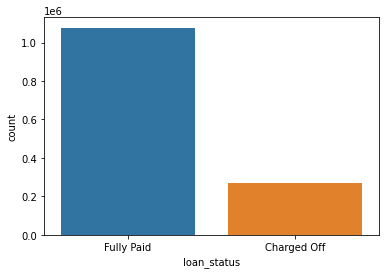

In [22]:
sns.countplot(x="loan_status", data=df)

In [23]:
for column in df.columns:
    if df[column].nunique() == 1:
        # In ra tên cột
        print("Column with all identical values:", column)

Column with all identical values: pymnt_plan
Column with all identical values: out_prncp
Column with all identical values: out_prncp_inv
Column with all identical values: policy_code
Column with all identical values: hardship_flag


- Sau kiểm tra các cột thì ta thấy có 5 cột cần được loại bỏ vì các giá trị của cột đều giống nhau

In [24]:
cols_to_drop = ['pymnt_plan','out_prncp', 'out_prncp_inv', 'policy_code','hardship_flag']
df = df.drop(columns=cols_to_drop)
df.shape

(1345310, 51)

# Kiểm tra mức độ tương quan của các cột còn lại

In [25]:
c = df.corr().abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']

cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr']>0.80)

corr_pairs[cond1 & cond2]

,feature1,feature2,corr
1,fico_range_low,fico_range_high,1.000000
2,funded_amnt,loan_amnt,0.999562
3,total_pymnt_inv,total_pymnt,0.999293
4,funded_amnt_inv,funded_amnt,0.999095
5,funded_amnt_inv,loan_amnt,0.998567
6,recoveries,collection_recovery_fee,0.970515
7,total_pymnt,total_rec_prncp,0.967172
8,total_rec_prncp,total_pymnt_inv,0.966541
9,funded_amnt,installment,0.954053
10,loan_amnt,installment,0.953401


**Từ điển dữ liệu**

| Cột | Định nghĩa |
|:--:|:--:|
| loan_amnt | Số tiền vay được liệt kê mà người vay yêu cầu. Nếu tại một thời điểm nào đó, bộ phận tín dụng giảm số tiền cho vay thì nó sẽ được phản ánh vào giá trị này. |
| term | Số lần thanh toán khoản vay. Giá trị tính bằng tháng và có thể là 36 hoặc 60. |
| int_rate | Lãi suất cho vay |
| installment | Khoản thanh toán hàng tháng mà người đi vay phải trả nếu khoản vay bắt đầu. |
| grade | LC chỉ định cấp cho vay |
| sub_grade | LC được giao cho khoản vay phụ |
| emp_title | Chức danh công việc do Bên vay cung cấp khi đăng ký khoản vay.* |
| emp_length | Thời gian làm việc tính bằng năm. Các giá trị có thể nằm trong khoảng từ 0 đến 10 trong đó 0 có nghĩa là dưới một năm và 10 có nghĩa là mười năm trở lên. |
| home_ownership |Tình trạng sở hữu nhà do người vay cung cấp trong quá trình đăng ký hoặc lấy được từ báo cáo tín dụng. Giá trị của chúng tôi là: THUÊ, SỞ HỮU, THẾ CHẤP, KHÁC |
| annual_inc | Thu nhập hàng năm tự báo cáo do người vay cung cấp trong quá trình đăng ký. |
| verification_status | Cho biết liệu thu nhập đã được LC xác minh chưa, chưa được xác minh hoặc nguồn thu nhập đã được xác minh hay chưa |
| issue_d | Tháng mà khoản vay được tài trợ |
| loan_status | Trạng thái hiện tại của khoản vay |
| purpose | Một danh mục được cung cấp bởi người vay cho yêu cầu vay vốn. |
| title | Tiêu đề khoản vay được cung cấp bởi người đi vay  |
| zip_code | 3 số đầu của mã zip do người vay cung cấp trong đơn xin vay. |
| addr_state | Trạng thái được người vay cung cấp trong đơn xin vay |
| dti | Tỷ lệ được tính bằng tổng số nợ hàng tháng của người đi vay các khoản thanh toán trên tổng số nghĩa vụ nợ, không bao gồm khoản thế chấp và khoản vay LC được yêu cầu, chia cho thu nhập hàng tháng tự báo cáo của người đi vay. | 
| earliest_cr_line | Tháng mở hạn mức tín dụng được báo cáo sớm nhất của người vay |
| open_acc | Số hạn mức tín dụng mở trong hồ sơ tín dụng của người vay. |
| pub_rec | Số lượng hồ sơ công khai xúc phạm |
| revol_bal | Tổng số dư quay vòng tín dụng |
| revol_util | Tỷ lệ sử dụng dòng quay vòng hoặc số tiền tín dụng người đi vay đang sử dụng tương ứng với tất cả tín dụng quay vòng hiện có. |
| total_acc | Tổng số hạn mức tín dụng hiện có trong hồ sơ tín dụng của người vay | 
| initial_list_status | Trạng thái niêm yết ban đầu của khoản vay. Các giá trị có thể là – W, F |
| application_type | Cho biết khoản vay là đơn đăng ký riêng lẻ hay đơn đăng ký chung với hai người đồng vay |
| mort_acc |Số lượng tài khoản thế chấp.  |
| pub_rec_bankruptcies | Số hồ sơ công khai bị phá sản |

### 📈 Các đặc điểm số tương quan với biến mục tiêu ?

-> Các đặc điểm liên quan đến người nộp đơn (các biến số về nhân khẩu học như nghề nghiệp, chi tiết việc làm, v.v.),

-> Các đặc điểm liên quan đến đặc điểm khoản vay (số tiền vay, lãi suất, mục đích vay, v.v.)

add Codeadd Markdown

- từ bảng ta thấy nhiều cột có mối tương quan mạnh và các biết có thể chứa thông tin tương tự.

In [26]:
df.funded_amnt

0           3600.0
1          24700.0
2          20000.0
4          10400.0
5          11950.0
            ...   
2260688    18000.0
2260690    29400.0
2260691    32000.0
2260692    16000.0
2260697    24000.0
Name: funded_amnt, Length: 1345310, dtype: float64

In [27]:
df.loan_amnt

0           3600.0
1          24700.0
2          20000.0
4          10400.0
5          11950.0
            ...   
2260688    18000.0
2260690    29400.0
2260691    32000.0
2260692    16000.0
2260697    24000.0
Name: loan_amnt, Length: 1345310, dtype: float64

- Ta xóa đi các cột ở feature1 để giảm bớt dữ liệu không cần thiết

In [28]:
cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df = df.drop(columns=cols_to_drop)
df.shape

(1345310, 42)

In [29]:
df

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,last_fico_range_high,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,564.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,699.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,704.0,0.0,Joint App,0.0,0.0,0.0,0.0,0.0,Cash,N
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,704.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,759.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,709.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,719.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,499.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,684.0,0.0,Individual,0.0,0.0,0.0,3.0,0.0,Cash,N


In [30]:
df.dropna(axis=1, thresh=10)

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,last_fico_range_high,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,564.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,699.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,704.0,0.0,Joint App,0.0,0.0,0.0,0.0,0.0,Cash,N
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,704.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,759.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,709.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,719.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,499.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,684.0,0.0,Individual,0.0,0.0,0.0,3.0,0.0,Cash,N


In [31]:
df['url'].unique()

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=68407277',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=68355089',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=68341763',
       ...,
       'https://lendingclub.com/browse/loanDetail.action?loan_id=89996426',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90006534',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=88224441'],
      dtype=object)

- cột này không có ý nghĩa với mô hình nên ta drop

In [32]:
df = df.drop(columns=['url'])

df.shape

(1345310, 41)

# Astype lại cho các cột sai kiểu


In [33]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 41 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  object 
 1   loan_amnt                   1345310 non-null  float64
 2   term                        1345310 non-null  object 
 3   int_rate                    1345310 non-null  float64
 4   grade                       1345310 non-null  object 
 5   sub_grade                   1345310 non-null  object 
 6   home_ownership              1345310 non-null  object 
 7   annual_inc                  1345310 non-null  float64
 8   verification_status         1345310 non-null  object 
 9   issue_d                     1345310 non-null  object 
 10  loan_status                 1345310 non-null  object 
 11  purpose                     1345310 non-null  object 
 12  zip_code                    1345309 non-null  object 
 1

In [34]:
# df['id'] = df['id'].astype(int)
# df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
# df['issue_d'] = pd.to_datetime(df['issue_d'])
# df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
# df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])

In [35]:
df['id'] = df['id'].astype(int)
df['issue_d'] = pd.to_datetime(df['issue_d']).map(pd.Timestamp.toordinal)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line']).map(pd.Timestamp.toordinal)
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d']).map(pd.Timestamp.toordinal)
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d']).map(pd.Timestamp.toordinal)

In [36]:
df['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

In [37]:
df['term']=pd.factorize(df['term'])[0]
df['grade']=pd.factorize(df['grade'])[0]
df['sub_grade']=pd.factorize(df['sub_grade'])[0]
df['home_ownership']=pd.factorize(df['home_ownership'])[0]
df['verification_status']=pd.factorize(df['verification_status'])[0]
df['loan_status']=pd.factorize(df['loan_status'])[0]
df['purpose']=pd.factorize(df['purpose'])[0]
df['zip_code']=pd.factorize(df['zip_code'])[0]
df['addr_state']=pd.factorize(df['addr_state'])[0]
df['initial_list_status']=pd.factorize(df['initial_list_status'])[0]
df['application_type']=pd.factorize(df['application_type'])[0]
df['disbursement_method']=pd.factorize(df['disbursement_method'])[0]
df['debt_settlement_flag']=pd.factorize(df['debt_settlement_flag'])[0]

In [38]:
df.head(10)

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,last_fico_range_high,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag
0,68407277,3600.0,0,13.99,0,0,0,55000.0,0,735933,...,564.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,68355089,24700.0,0,11.99,0,1,0,65000.0,0,735933,...,699.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
2,68341763,20000.0,1,10.78,1,2,0,63000.0,0,735933,...,704.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0
4,68476807,10400.0,1,22.45,2,3,0,104433.0,1,735933,...,704.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
5,68426831,11950.0,0,13.44,0,4,1,34000.0,1,735933,...,759.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
6,68476668,20000.0,0,9.17,1,5,0,180000.0,0,735933,...,654.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
7,67275481,20000.0,0,8.49,1,6,0,85000.0,0,735933,...,674.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
8,68466926,10000.0,0,6.49,3,7,1,85000.0,0,735933,...,719.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0,0
9,68616873,8000.0,0,11.48,1,8,0,42000.0,0,735933,...,679.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
12,68338832,1400.0,0,12.88,0,9,0,64000.0,0,735933,...,704.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 41 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  int64  
 1   loan_amnt                   1345310 non-null  float64
 2   term                        1345310 non-null  int64  
 3   int_rate                    1345310 non-null  float64
 4   grade                       1345310 non-null  int64  
 5   sub_grade                   1345310 non-null  int64  
 6   home_ownership              1345310 non-null  int64  
 7   annual_inc                  1345310 non-null  float64
 8   verification_status         1345310 non-null  int64  
 9   issue_d                     1345310 non-null  int64  
 10  loan_status                 1345310 non-null  int64  
 11  purpose                     1345310 non-null  int64  
 12  zip_code                    1345310 non-null  int64  
 1

# Tiếp tục Trực quan hóa cho các cột còn lại

In [40]:
df.corr()

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,last_fico_range_high,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag
id,1.000000,0.011857,-0.017154,-0.015019,-0.021565,-0.019429,0.023967,0.035633,-0.056683,0.947150,...,-0.002610,0.036980,0.202970,0.002588,0.008251,0.004453,0.055647,0.020549,0.108194,0.028726
loan_amnt,0.011857,1.000000,0.380905,0.141673,0.086722,0.080001,-0.141431,0.311794,0.223627,0.034245,...,0.051080,-0.018496,0.073324,0.001526,-0.000854,0.000428,-0.094485,0.007418,0.005209,0.019515
term,-0.017154,0.380905,1.000000,0.417230,0.133770,0.115473,-0.084397,0.050016,0.128404,-0.007026,...,-0.094643,-0.008408,0.041924,-0.000060,-0.001398,-0.000718,-0.010674,-0.012303,0.002075,0.050906
int_rate,-0.015019,0.141673,0.417230,1.000000,0.314366,0.259542,0.051666,-0.072245,0.256116,-0.003550,...,-0.348905,0.015300,0.040069,0.017235,0.011384,0.005327,0.058906,0.011823,0.004463,0.067900
grade,-0.021565,0.086722,0.133770,0.314366,1.000000,0.699832,0.000691,0.006657,0.057298,-0.020172,...,-0.053995,-0.005133,0.004766,-0.000349,-0.003785,0.000095,-0.019668,-0.004444,0.018389,0.024417
sub_grade,-0.019429,0.080001,0.115473,0.259542,0.699832,1.000000,-0.001857,0.010531,0.053559,-0.021048,...,-0.038344,-0.005562,0.004863,-0.000868,-0.003585,0.000558,-0.018018,-0.004101,0.017162,0.017348
home_ownership,0.023967,-0.141431,-0.084397,0.051666,0.000691,-0.001857,1.000000,-0.116069,-0.007606,0.017325,...,-0.078524,0.006756,-0.040844,-0.009456,-0.003227,0.000789,0.005166,0.002649,0.004518,0.016422
annual_inc,0.035633,0.311794,0.050016,-0.072245,0.006657,0.010531,-0.116069,1.000000,0.040179,0.038268,...,0.068104,-0.003990,-0.037053,0.013371,0.008834,0.006596,-0.044552,0.037802,-0.003424,-0.014156
verification_status,-0.056683,0.223627,0.128404,0.256116,0.057298,0.053559,-0.007606,0.040179,1.000000,-0.040255,...,-0.105264,0.011409,0.009430,0.015686,0.016328,0.008376,0.024923,0.019964,0.006305,0.028201
issue_d,0.947150,0.034245,-0.007026,-0.003550,-0.020172,-0.021048,0.017325,0.038268,-0.040255,1.000000,...,-0.013948,0.040876,0.179513,0.007658,0.013599,0.005015,0.067510,0.028786,0.097448,0.034545


- ta sẽ check lần lượt các cột có tỉ lên tương quan cao trên bảng và in ra các cột có độ tương quan cao hơn 50%


In [41]:
correlation_matrix = df.corr()
printed_pairs = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        # Kiểm tra nếu độ tương quan lớn hơn 50% và không trùng nhau
        if correlation_matrix.loc[col1, col2] > 0.5 and col1 != col2:
            pair = tuple(sorted([col1, col2]))  
            if pair not in printed_pairs:
                correlation_percentage = correlation_matrix.loc[col1, col2] * 100
                print(f"Độ tương quan giữa {col1} và {col2}: {correlation_percentage}%")
                printed_pairs.add(pair)

Độ tương quan giữa id và issue_d: 94.71501977173932%
Độ tương quan giữa loan_amnt và total_rec_int: 62.5869866123939%
Độ tương quan giữa loan_amnt và last_pymnt_amnt: 50.33434506082097%
Độ tương quan giữa grade và sub_grade: 69.98324535223756%
Độ tương quan giữa loan_status và recoveries: 50.54149498825168%
Độ tương quan giữa open_acc và total_acc: 70.13252558142547%
Độ tương quan giữa pub_rec và pub_rec_bankruptcies: 64.96367851471943%
Độ tương quan giữa pub_rec và tax_liens: 69.8649398012978%


- ta ra được 16 cột 8 giá trị tương quan lớn hơn 50 % của các cột


# kiểm tra 2 cột grade và sub_grade vì có độ tương quan 70%

In [42]:
# # biểu đồ kiểm tra số lần kiểm tra trên grade và loan_pay

# sns.countplot(x=df_accepted.grade, hue=.loan_paid)

In [43]:
# # biểu đồ kiểm tra số lần kiểm tra trên sub_grade và loan_pay
# l = list(df_accepted.sub_grade.unique())
# l.sort()

# plt.figure(figsize=(12,4))
# sns.countplot(x=df_accepted.sub_grade, order=l, hue=df_accepted.loan_paid, palette='coolwarm')

In [44]:
# vì lớp là một phần của sub_grade, nên chúng ta hãy bỏ tính năng xếp hạng đi.
df = df.drop(columns='grade')

In [45]:
# df = df.drop(columns='id')

# check các cột có nhiều giá trị 0

In [46]:
import pandas as pd

# Tính tổng count số dòng bằng 0 cho mỗi cột
zero_count = (df_accepted ==0).sum()

# Tính tổng số dòng trong DataFrame
total_rows = len(df_accepted)

# Lấy danh sách các cột có tổng count số dòng bằng 0 vượt quá 50%
columns_to_print = zero_count[zero_count / total_rows > 0.1]

# In ra tên cột và tỷ lệ phần trăm tương ứng
for column, count in columns_to_print.iteritems():
    percentage = count / total_rows * 100
    print(f"{column}: {percentage:.2f}%")

delinq_2yrs: 81.35%
inq_last_6mths: 61.12%
pub_rec: 84.17%
out_prncp: 59.84%
out_prncp_inv: 59.84%
total_rec_late_fee: 96.14%
recoveries: 91.80%
collection_recovery_fee: 92.17%
collections_12_mths_ex_med: 98.34%
acc_now_delinq: 99.61%
tot_coll_amt: 82.10%
open_acc_6m: 27.78%
open_il_12m: 33.63%
open_il_24m: 16.70%
open_rv_12m: 22.72%
inq_fi: 30.84%
total_cu_tl: 33.31%
inq_last_12m: 17.70%
chargeoff_within_12_mths: 99.23%
delinq_amnt: 99.68%
mort_acc: 41.12%
num_accts_ever_120_pd: 74.64%
num_tl_120dpd_2m: 93.15%
num_tl_30dpd: 96.63%
num_tl_90g_dpd_24m: 91.70%
num_tl_op_past_12m: 18.40%
percent_bc_gt_75: 26.48%
pub_rec_bankruptcies: 87.91%
tax_liens: 97.14%
total_il_high_credit_limit: 11.66%


- ta thấy các cột có giá trị bằng 0 lớn hơn 60 % rất nhiều mà cột đã chiếm hơn 60% là 0 thì ta nên drop 

In [47]:
cols_to_drop = ['delinq_2yrs','inq_last_6mths', 'pub_rec', 'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens']
df = df.drop(columns=cols_to_drop)
df.shape

(1345310, 30)

In [48]:
df

,id,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,initial_list_status,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,disbursement_method,debt_settlement_flag
0,68407277,3600.0,0,13.99,0,0,55000.0,0,735933,0,...,0,821.72,0.0,737060,122.67,737119,564.0,0,0,0
1,68355089,24700.0,0,11.99,1,0,65000.0,0,735933,0,...,0,979.66,0.0,736116,926.35,737119,699.0,0,0,0
2,68341763,20000.0,1,10.78,2,0,63000.0,0,735933,0,...,0,2705.92,0.0,736481,15813.30,737119,704.0,1,0,0
4,68476807,10400.0,1,22.45,3,0,104433.0,1,735933,0,...,0,1340.50,0.0,736146,10128.96,736754,704.0,0,0,0
5,68426831,11950.0,0,13.44,4,1,34000.0,1,735933,0,...,0,1758.95,0.0,736450,7653.56,736450,759.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,1,9.49,5,2,130000.0,0,736238,0,...,1,2756.23,0.0,736907,12828.77,737119,709.0,0,0,0
2260690,88948836,29400.0,1,13.99,4,0,180792.0,0,736238,0,...,1,6448.76,0.0,736876,22192.81,736876,719.0,0,0,0
2260691,89996426,32000.0,1,14.49,0,0,157000.0,1,736238,1,...,1,1861.47,0.0,736389,752.74,737029,499.0,0,0,0
2260692,90006534,16000.0,1,12.79,1,1,150000.0,0,736238,0,...,1,2660.61,0.0,736754,12874.54,737119,684.0,0,0,0


In [49]:
df = df.drop(columns='total_rec_late_fee')
df.shape

(1345310, 29)

In [50]:
df = df.drop(columns='disbursement_method')
df.shape

(1345310, 28)

- xóa cột này vì có thể thanh toán bằng bất kì phương thức gì nên cột này không cần thiết

In [51]:
df = df.drop(columns='zip_code')
df.shape

(1345310, 27)

- Xóa cột này vì 'zip_code'không liên quan gì đến dự đoán

In [52]:
df

,id,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_util,total_acc,initial_list_status,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,debt_settlement_flag
0,68407277,3600.0,0,13.99,0,0,55000.0,0,735933,0,...,29.7,13.0,0,821.72,737060,122.67,737119,564.0,0,0
1,68355089,24700.0,0,11.99,1,0,65000.0,0,735933,0,...,19.2,38.0,0,979.66,736116,926.35,737119,699.0,0,0
2,68341763,20000.0,1,10.78,2,0,63000.0,0,735933,0,...,56.2,18.0,0,2705.92,736481,15813.30,737119,704.0,1,0
4,68476807,10400.0,1,22.45,3,0,104433.0,1,735933,0,...,64.5,35.0,0,1340.50,736146,10128.96,736754,704.0,0,0
5,68426831,11950.0,0,13.44,4,1,34000.0,1,735933,0,...,68.4,6.0,0,1758.95,736450,7653.56,736450,759.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,1,9.49,5,2,130000.0,0,736238,0,...,34.0,39.0,1,2756.23,736907,12828.77,737119,709.0,0,0
2260690,88948836,29400.0,1,13.99,4,0,180792.0,0,736238,0,...,85.2,32.0,1,6448.76,736876,22192.81,736876,719.0,0,0
2260691,89996426,32000.0,1,14.49,0,0,157000.0,1,736238,1,...,27.4,18.0,1,1861.47,736389,752.74,737029,499.0,0,0
2260692,90006534,16000.0,1,12.79,1,1,150000.0,0,736238,0,...,55.0,28.0,1,2660.61,736754,12874.54,737119,684.0,0,0


<!-- dti, open_acc, revol_bal, revol_util, & total_acc -->

In [53]:
df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_high',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
       'application_type', 'debt_settlement_flag'],
      dtype='object')

ta thấy với cột này gần 100% giá trị bằng 0.0 nên ta sẽ drop

In [54]:
# check lại các giá trị tương quan
correlation_matrix = df.corr()
printed_pairs = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        # Kiểm tra nếu độ tương quan lớn hơn 50% và không trùng nhau
        if correlation_matrix.loc[col1, col2] > 0.5 and col1 != col2:
            pair = tuple(sorted([col1, col2]))  
            if pair not in printed_pairs:
                correlation_percentage = correlation_matrix.loc[col1, col2] * 100
                print(f"Độ tương quan giữa {col1} và {col2}: {correlation_percentage}%")
                printed_pairs.add(pair)

Độ tương quan giữa id và issue_d: 94.71501977173932%
Độ tương quan giữa loan_amnt và total_rec_int: 62.5869866123939%
Độ tương quan giữa loan_amnt và last_pymnt_amnt: 50.33434506082097%
Độ tương quan giữa open_acc và total_acc: 70.13252558142547%


## Trực quan hóa dữ liệu

### Giới thiệu
- LendingClub là công ty cho vay.
- Giải quyết các vấn đề kinh doanh thực tế bằng cách sử dụng EDA và Machine Learning. 
- Phát triển hiểu biết cơ bản về phân tích rủi ro trong các dịch vụ tài chính ngân hàng
- Đồng thời hiểu cách sử dụng dữ liệu để giảm thiểu rủi ro mất tiền khi cho khách hàng vay.

### Hiểu biết kinh doanh

- Khi công ty nhận được đơn xin vay vốn, công ty phải đưa ra quyết định phê duyệt khoản vay dựa trên hồ sơ của người nộp đơn. Hai loại rủi ro liên quan đến quyết định của ngân hàng:

    + Nếu người nộp đơn có khả năng hoàn trả khoản vay thì việc không phê duyệt khoản vay sẽ dẫn đến việc công ty thua lỗ trong hoạt động kinh doanh
    + Nếu người nộp đơn không có khả năng hoàn trả khoản vay, tức là họ có khả năng vỡ nợ, thì việc phê duyệt khoản vay có thể dẫn đến tổn thất tài chính cho công ty

- Dữ liệu chứa thông tin về những người đăng ký khoản vay trước đây và liệu họ có 'vỡ nợ' hay không. Mục đích là để xác định các mẫu cho biết liệu một người có khả năng vỡ nợ hay không, mẫu này có thể được sử dụng để thực hiện các hành động như từ chối khoản vay, giảm số tiền cho vay, cho vay với lãi suất cao hơn (đối với những người nộp đơn rủi ro), v.v.

- Khi một người nộp đơn xin vay tiền, công ty có thể đưa ra hai loại quyết định:

    - Khoản vay được chấp nhận (Loan accepted): có 3 trường hợp có thể xảy ra được mô tả dưới đây:
    
        + Fully paid: Người nộp đơn đã thanh toán đầy đủ khoản vay (gốc và lãi)
        + Current: Người nộp đơn đang trong quá trình thanh toán các khoản trả góp, tức là thời hạn của khoản vay vẫn chưa hoàn thành. Những ứng cử viên này không được gắn nhãn là 'mặc định'.
        + Charged-off: Người nộp đơn đã không thanh toán các khoản trả góp đúng hạn trong một thời gian dài, tức là họ đã không trả được nợ
        
    - Khoản vay bị từ chối (Loan rejected): Công ty đã từ chối khoản vay (vì ứng viên không đáp ứng được yêu cầu của họ, v.v.). Vì khoản vay bị từ chối nên không có lịch sử giao dịch của những người nộp đơn đó với công ty và do đó dữ liệu này không có sẵn

### Mục tiêu kinh doanh

- LendingClub là thị trường cho vay trực tuyến lớn nhất, tạo điều kiện cho các khoản vay cá nhân, khoản vay kinh doanh và tài trợ cho các thủ tục y tế. Người vay có thể dễ dàng tiếp cận các khoản vay lãi suất thấp hơn thông qua giao diện trực tuyến nhanh chóng.

- Giống như hầu hết các công ty cho vay khác, **việc cho vay đối với những người nộp đơn 'rủi ro' là nguồn gây tổn thất tài chính lớn nhất** (được gọi là tổn thất tín dụng). Tổn thất tín dụng là số tiền mà người cho vay bị mất khi người đi vay từ chối trả tiền hoặc bỏ trốn với số tiền nợ. Nói cách khác, người đi vay không trả được nợ sẽ gây ra tổn thất lớn nhất cho người cho vay. Trong trường hợp này, những khách hàng được gắn nhãn là 'bị tính phí' là 'những người vi phạm'.

- Nếu người ta có thể xác định được những người nộp đơn xin vay rủi ro này thì những khoản vay đó có thể được giảm bớt do đó cắt giảm số tiền tổn thất tín dụng.**Mục đích của nghiên cứu điển hình này là xác định những người nộp đơn như vậy bằng cách sử dụng EDA và học máy.**

- Nói cách khác, công ty muốn hiểu các yếu tố thúc đẩy (hoặc các biến số điều khiển) đằng sau việc vỡ nợ, tức là các biến số là chỉ báo mạnh về khả năng vỡ nợ. Công ty có thể sử dụng kiến thức này cho danh mục đầu tư và đánh giá rủi ro của mình.
- Để phát triển sự hiểu biết của bạn về lĩnh vực này, bạn nên nghiên cứu độc lập một chút về phân tích rủi ro (hiểu được các loại biến số và tầm quan trọng của chúng là đủ).

In [55]:
df.sample(20)

,id,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_util,total_acc,initial_list_status,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,debt_settlement_flag
1196376,26859475,3600.0,0,15.61,17,1,65000.0,2,735477,1,...,75.5,27.0,1,181.10,735599,125.88,737119,509.0,0,0
134902,60880391,22600.0,0,7.26,11,0,62000.0,1,735842,0,...,54.5,23.0,1,1302.36,736146,17584.59,737119,739.0,0,0
2173905,95149142,35000.0,0,12.74,1,2,110000.0,1,736299,0,...,90.6,23.0,1,5139.17,736846,20401.03,736876,679.0,0,0
1024837,73744584,7000.0,0,5.32,14,2,37000.0,0,736024,0,...,25.2,24.0,0,498.59,736726,7.59,736726,764.0,0,0
1340305,10767180,9000.0,0,8.90,21,0,45000.0,0,735234,0,...,53.6,28.0,1,1084.82,736116,272.31,737029,779.0,0,0
265382,50579347,28000.0,0,16.99,19,2,60223.0,1,735719,1,...,51.0,37.0,0,8019.32,736754,998.14,737119,584.0,0,0
145236,59382541,16000.0,1,16.99,19,0,55000.0,1,735842,0,...,56.0,32.0,0,4028.90,736450,12475.40,736876,639.0,0,0
1063885,71502181,20000.0,0,7.39,11,2,126000.0,2,735995,0,...,62.0,28.0,0,2351.89,737091,620.90,737091,749.0,0,0
1842452,5406216,15000.0,0,16.29,0,0,60000.0,2,735020,0,...,40.8,16.0,1,4062.16,736116,529.30,736573,589.0,0,0
690745,78660417,11250.0,0,11.47,8,0,73000.0,1,736085,1,...,68.0,23.0,0,1126.60,736450,370.82,736634,564.0,0,0


In [56]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

<AxesSubplot:>

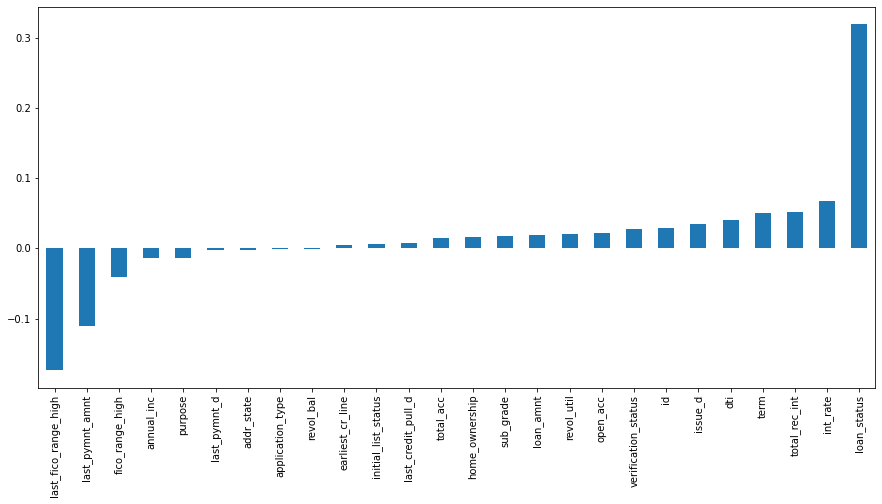

In [57]:
plt.figure(figsize=(15,7))
new_corr = df.corr().iloc[:-1,-1].sort_values()
new_corr.plot.bar(rot=90)

# với LogisticRegression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
df['id'] = df['id'].astype(int)
df['issue_d'] = pd.to_datetime(df['issue_d']).map(pd.Timestamp.toordinal)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line']).map(pd.Timestamp.toordinal)
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d']).map(pd.Timestamp.toordinal)
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d']).map(pd.Timestamp.toordinal)

In [61]:
categorical_cols = ['term', 'sub_grade', 'home_ownership', 'verification_status',
                    'purpose', 'addr_state', 'initial_list_status', 'application_type', 'debt_settlement_flag']
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

In [62]:
dit = df.dropna()

In [63]:
X = dit.drop(columns=['loan_status'])
y = dit.loan_status

In [64]:
df

,id,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_util,total_acc,initial_list_status,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,debt_settlement_flag
0,68407277,3600.0,0,13.99,0,0,55000.0,0,719163,0,...,29.7,13.0,0,821.72,719163,122.67,719163,564.0,0,0
1,68355089,24700.0,0,11.99,1,0,65000.0,0,719163,0,...,19.2,38.0,0,979.66,719163,926.35,719163,699.0,0,0
2,68341763,20000.0,1,10.78,2,0,63000.0,0,719163,0,...,56.2,18.0,0,2705.92,719163,15813.30,719163,704.0,1,0
4,68476807,10400.0,1,22.45,3,0,104433.0,1,719163,0,...,64.5,35.0,0,1340.50,719163,10128.96,719163,704.0,0,0
5,68426831,11950.0,0,13.44,4,1,34000.0,1,719163,0,...,68.4,6.0,0,1758.95,719163,7653.56,719163,759.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,1,9.49,5,2,130000.0,0,719163,0,...,34.0,39.0,1,2756.23,719163,12828.77,719163,709.0,0,0
2260690,88948836,29400.0,1,13.99,4,0,180792.0,0,719163,0,...,85.2,32.0,1,6448.76,719163,22192.81,719163,719.0,0,0
2260691,89996426,32000.0,1,14.49,0,0,157000.0,1,719163,1,...,27.4,18.0,1,1861.47,719163,752.74,719163,499.0,0,0
2260692,90006534,16000.0,1,12.79,1,1,150000.0,0,719163,0,...,55.0,28.0,1,2660.61,719163,12874.54,719163,684.0,0,0


In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
import pandas as pd

df_X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
print(df_X_scaled)

               id  loan_amnt      term  int_rate  sub_grade  home_ownership  \
0        0.315126  -1.241593 -0.563872  0.157719  -1.396681       -0.908988   
1        0.313765   1.179454 -0.563872 -0.261737  -1.274369       -0.908988   
2        0.313418   0.640169  1.773452 -0.515508  -1.152058       -0.908988   
3        0.316939  -0.461351  1.773452  1.932016  -1.029746       -0.908988   
4        0.315636  -0.283501 -0.563872  0.042368  -0.907435        0.571686   
...           ...        ...       ...       ...        ...             ...   
1344075  0.875749   0.410686  1.773452 -0.786057  -0.785123        2.052360   
1344076  0.850812   1.718740  1.773452  0.157719  -0.907435       -0.908988   
1344077  0.878131   2.017068  1.773452  0.262582  -1.396681       -0.908988   
1344078  0.878394   0.181202  1.773452 -0.093955  -1.274369        0.571686   
1344079  0.831921   1.099135  1.773452  0.262582  -1.396681        0.571686   

         annual_inc  verification_status  issue_d  

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [68]:
y_test.shape, X_test.shape, X_train.shape

((268816,), (268816, 26), (1075264, 26))

In [69]:
model = LogisticRegression(max_iter=1000)

In [70]:
import time
start_time = time.time()

In [71]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [73]:
y_pred_lr = model.predict(X_test)

In [74]:
# Đánh giá mô hình LogisticRegression¶
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print('Accuracy:', accuracy_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1-Score:', f1_lr)

Accuracy: 0.9520117850127968
Precision: 0.8831386586284853
Recall: 0.8749953335573226
F1-Score: 0.8790481369662647


In [75]:
end_time = time.time()

execution_time = end_time - start_time
print("Thời gian chạy mô hình Logistic Regression: ", execution_time)

Thời gian chạy mô hình Logistic Regression:  9.347416877746582


In [76]:
report = classification_report(y_test, y_pred_lr)

print("Báo cáo phân loại:\n", report)

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97    215242
           1       0.88      0.87      0.88     53574

    accuracy                           0.95    268816
   macro avg       0.93      0.92      0.92    268816
weighted avg       0.95      0.95      0.95    268816



In [81]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_lr))


[[209039   6203]
 [  6697  46877]]


In [77]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [78]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

In [79]:
print("Ma trận nhầm lẫn của tập huấn luyện:")
print(cm_train)

print("\nMa trận nhầm lẫn của tập kiểm tra lại:")
print(cm_test)

Ma trận nhầm lẫn của tập huấn luyện:
[[836120  24410]
 [ 26774 187960]]

Ma trận nhầm lẫn của tập kiểm tra lại:
[[209039   6203]
 [  6697  46877]]


Kết quả cho thấy

- mô hình Logistic Regression có độ chính xác khá cao, đạt khoảng 97.85%.
- Độ chính xác dương tính (Precision) là 96,02%, cho biết tỷ lệ dự đoán đúng các trường hợp dương tính (positive) là rất tốt.
- Độ phủ (Recall) đạt 93,07%, cho biết mô hình có khả năng tìm ra các trường hợp dương tính (positive) khá tốt.
- F1-Score có giá trị là 94,52, cho thấy mô hình có hiệu suất tương khá tốt trong việc cân bằng giữa Precision và Recall.

In [80]:
model.coef_

array([[ 2.64791251e-01,  1.41609334e+00,  8.27733235e-01,
         5.58660434e-01, -7.67331079e-03,  3.54498770e-02,
        -1.22281008e-01,  5.39128423e-02,  0.00000000e+00,
        -5.62737303e-02,  1.11257049e-02,  1.16551999e-01,
         0.00000000e+00,  1.51389296e-01, -6.94665707e-02,
        -3.04492273e-02, -9.67423176e-02,  2.25904820e-01,
         1.98689471e-02, -1.17406298e+00,  0.00000000e+00,
        -8.96076492e+00,  0.00000000e+00, -2.42826934e+00,
         5.12810052e-02,  4.12924630e+00]])

In [81]:
model.intercept_

array([-7.28657587])

In [82]:
coefficients = model.coef_

# Chuyển đổi ma trận hệ số thành mảng 1 chiều
coefficients_flat = coefficients.flatten()

# Lấy 15 cột có giá trị tuyệt đối lớn nhất
top_15_columns = abs(coefficients_flat).argsort()[-15:][::-1]

# Hiển thị tên của các cột
column_names = X_new_customer.columns
top_15_column_names = column_names[top_15_columns]

print(top_15_column_names)

NameError: name 'X_new_customer' is not defined

In [ ]:
df.columns

In [ ]:
num_paid = sum(y_pred_lr)  # Số người thanh toán
num_not_paid = len(y_pred_lr) - num_paid
print("Số người thanh toán:", num_paid)
print("Số người không thanh toán:", num_not_paid)
print("%Số người thanh toán",(num_paid/len(y_pred_lr))*100)
print("%Số người k thanh toán",100-(num_paid/len(y_pred_lr))*100)

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import time
start_time = time.time()

In [ ]:
# Huấn luyện mô hình Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

In [ ]:
# Dự đoán nhãn trên tập kiểm tra bằng mô hình Decision Tree
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# Đánh giá mô hình Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print('Accuracy:', accuracy_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1-Score:', f1_dt)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time
print("Thời gian chạy mô hình decision tree: ", execution_time)

In [ ]:
# In kết quả đánh giá
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Report:\n", report_dt)

Kết quả cho thấy

- mô hình Decision Tree có độ chính xác rất cao, đạt khoảng 96,6%.

- Độ chính xác dương tính (Precision) và độ phủ (Recall) đều đạt 98.00%, cho thấy mô hình có khả năng dự đoán đúng các trường hợp dương tính (positive) và tìm ra các trường hợp dương tính (positive) rất tốt.

- F1-Score cũng đạt 98.00%, cho thấy mô hình có hiệu suất rất tốt trong việc cân bằng giữa Precision và Recall.

- Cho thấy mô hình Decision Tree có hiệu suất rất cao và khả năng phân loại tốt trên tập dữ liệu được sử dụng.

# Random Forest

In [ ]:
import time
start_time = time.time()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Huấn luyện mô hình Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

In [ ]:
# Dự đoán nhãn trên tập kiểm tra bằng mô hình Random Forest
y_pred_rf = random_forest.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-Score:', f1_rf)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time
print("Thời gian chạy mô hình Random Forest: ", execution_time)

In [ ]:
# Đánh giá mô hình Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# In kết quả đánh giá
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Report:\n", report_rf)

Kết quả cho thấy:

- mô hình Random Forest có độ chính xác rất cao, đạt khoảng 99.09%.
- Độ chính xác dương tính (Precision) là 99.00%, cho biết tỷ lệ dự đoán đúng các trường hợp dương tính (positive) là rất tốt.
- Độ phủ (Recall) là 96.00%, cho biết mô hình có khả năng tìm ra các trường hợp dương tính (positive) tương đối tốt.
- F1-Score là 98.00%, cho thấy mô hình có hiệu suất tương đối tốt trong việc cân bằng giữa Precision và Recall.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


In [ ]:
# Dự đoán nhãn trên tập kiểm tra bằng mô hình KNN
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

In [ ]:
# Đánh giá mô hình KNN
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# In kết quả đánh giá
print("KNN Accuracy:", accuracy)
print("KNN Report:\n", report)

- mô hình KNN có độ chính xác cao lên đến là 93.84% .
- độ chính xác dương tính (Precision) là 94.00%.
- Tuy nhiên, độ phủ (Recall) chỉ đạt 76.00%, cho thấy mô hình có khả năng tìm ra các trường hợp dương tính (positive) không cao.
- F1-Score là 83.00%, cho thấy mô hình có hiệu suất tương đối trong việc cân bằng giữa Precision và Recall.
- Mô hình KNN có độ chính xác tương đối cao, nhưng cần chú ý đến độ phủ thấp hơn so với các 2 mô hình mô hình Decision Tree và Random Forest. Điều này có thể gợi ý rằng KNN có thể gặp khó khăn trong việc phân loại các trường hợp dương tính (positive) đúng một cách đáng tin cậy hơn không bị tình trạng học tủ nhiều.

## các biểu đồ đánh so sánh và trực quan mô hình

In [ ]:
import matplotlib.pyplot as plt

# Độ chính xác (Accuracy)
accuracy_values = [accuracy_dt, accuracy_rf, accuracy, accuracy_lr]
models = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression']

plt.plot(models, accuracy_values, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Độ chính xác (Accuracy)
accuracy_values = [accuracy_dt, accuracy_rf, accuracy, accuracy_lr]
precision_values = [precision_dt, precision_rf, precision, precision_lr]
recall_values = [recall_dt, recall_rf, recall, recall_lr]
f1_values = [f1_dt, f1_rf, f1, f1_lr]
models = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression']

plt.plot(models, accuracy_values, marker='o', label='Accuracy')
plt.plot(models, precision_values, marker='o', label='Precision')
plt.plot(models, recall_values, marker='o', label='Recall')
plt.plot(models, f1_values, marker='o', label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics of Models')
plt.legend()

plt.show()

- Từ biểu đồ ta thấy hầu như các mô hình đều có tỉ lệ phần trăm dự đoán cho Accuracy,Precision,Recall,F1-Score đều ở mức cao và rất cao với mô hình (Decision Tree) các giá trị đều trên 95%
- Các giá trị có tỉ lệ phần trăm thấp nhất nằm ở mô hình KNN Recall chỉ hơn 70% cho thấy mô hình có khả năng tìm ra các trường hợp dương tính (positive) không cao.F1-Score của mô hình nây thấp hơn các mô hình khác cho thấy KNN có thể gặp khó khăn trong việc phân loại các trường hợp dương tính (positive), thêm nữa vì mô hình có độ khó dù tỉ lệ %thấp hơn nhưng sẽ xử lý dữ liệu một cách chính xác hơn 